**Data preparation, saving all comments in one variable.**

In [0]:
import pandas as pd
import numpy as np


In [2]:
data1= pd.read_excel("/content/Lowes.xlsx")
data1
data2=data1.comb_review
m=0
a=""
for i in data2:
  
  a= a+" "+str(i) 
print(a)


 n/a Mine stopped dispensing water after 8 months. The red light keeps flashing n/a There is no review to accompany this rating. "Broke on receipt" The door hinge was broken when i received it. It was not shipping damage. I think it was a prevoiusly returned item. It was very irritating to get a new item that was broken. It was then hard to get it back in the box. I returned for a refund because the plastic hinge is not a good idea on a bottom loading water dispenser. "LEAKS LIKE THE OTHERS - but it's an easy fix." I buy water in 5 gallon glass jugs that costs $4/gal. So, when reading reviews that various Primo water dispensers have a tendency to leak, I watched mine like a hawk. The water is too expensive to let it go to waste AND I just redid my kitchen floor. Lo and behold, I came home about 4 weeks after purchasing it and there was a puddle on the ground in front of it. I took the casing apart and figured out where the leak was coming from - and why it was happening.The water gets 

In [0]:
text=a.lower()

**Importing NLTK Libraries**

In [0]:

import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

**Tokenizing Sentences, THIS CAN BE SKIPPED**

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
tokenized_text=sent_tokenize(text)

In [7]:
print(tokenized_text)

[' n/a mine stopped dispensing water after 8 months.', 'the red light keeps flashing n/a there is no review to accompany this rating.', '"broke on receipt" the door hinge was broken when i received it.', 'it was not shipping damage.', 'i think it was a prevoiusly returned item.', 'it was very irritating to get a new item that was broken.', 'it was then hard to get it back in the box.', 'i returned for a refund because the plastic hinge is not a good idea on a bottom loading water dispenser.', '"leaks like the others - but it\'s an easy fix."', 'i buy water in 5 gallon glass jugs that costs $4/gal.', 'so, when reading reviews that various primo water dispensers have a tendency to leak, i watched mine like a hawk.', 'the water is too expensive to let it go to waste and i just redid my kitchen floor.', 'lo and behold, i came home about 4 weeks after purchasing it and there was a puddle on the ground in front of it.', 'i took the casing apart and figured out where the leak was coming from 

**Word Tokenizer to break each words**

In [0]:
tokenized_word=word_tokenize(text)

In [9]:
print(tokenized_word)

['n/a', 'mine', 'stopped', 'dispensing', 'water', 'after', '8', 'months', '.', 'the', 'red', 'light', 'keeps', 'flashing', 'n/a', 'there', 'is', 'no', 'review', 'to', 'accompany', 'this', 'rating', '.', '``', 'broke', 'on', 'receipt', "''", 'the', 'door', 'hinge', 'was', 'broken', 'when', 'i', 'received', 'it', '.', 'it', 'was', 'not', 'shipping', 'damage', '.', 'i', 'think', 'it', 'was', 'a', 'prevoiusly', 'returned', 'item', '.', 'it', 'was', 'very', 'irritating', 'to', 'get', 'a', 'new', 'item', 'that', 'was', 'broken', '.', 'it', 'was', 'then', 'hard', 'to', 'get', 'it', 'back', 'in', 'the', 'box', '.', 'i', 'returned', 'for', 'a', 'refund', 'because', 'the', 'plastic', 'hinge', 'is', 'not', 'a', 'good', 'idea', 'on', 'a', 'bottom', 'loading', 'water', 'dispenser', '.', '``', 'leaks', 'like', 'the', 'others', '-', 'but', 'it', "'s", 'an', 'easy', 'fix', '.', "''", 'i', 'buy', 'water', 'in', '5', 'gallon', 'glass', 'jugs', 'that', 'costs', '$', '4/gal', '.', 'so', ',', 'when', 'read

**Plooting Frequency of Words, plotting 30 high freq words**

In [10]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 2190 samples and 20385 outcomes>


In [11]:
fdist.most_common(20)

[('.', 1032),
 ('the', 934),
 ('water', 540),
 ('it', 526),
 ('to', 523),
 ('and', 472),
 ('i', 459),
 ('a', 450),
 (',', 436),
 ('is', 359),
 ('this', 322),
 ("''", 251),
 ('``', 247),
 ('of', 210),
 ('cooler', 202),
 ('for', 187),
 ('in', 178),
 ('that', 160),
 ('have', 158),
 ('!', 158)]

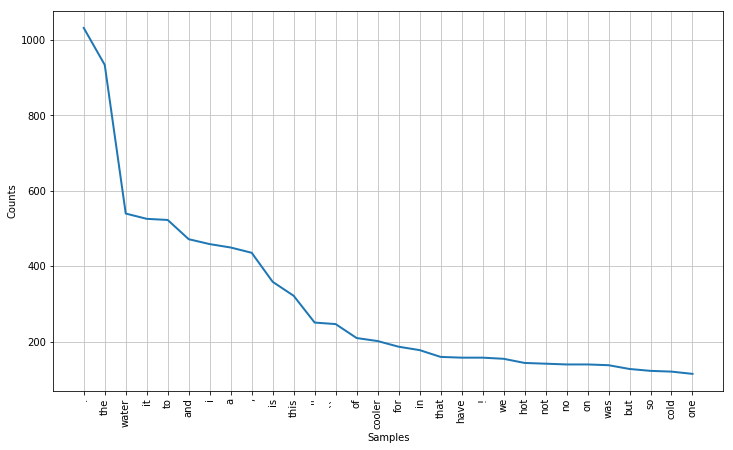

In [12]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words=set(stopwords.words("english"))

In [0]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

In [16]:
print("Filterd Words:",filtered_word[:100])

Filterd Words: ['n/a', 'mine', 'stopped', 'dispensing', 'water', '8', 'months', '.', 'red', 'light', 'keeps', 'flashing', 'n/a', 'review', 'accompany', 'rating', '.', '``', 'broke', 'receipt', "''", 'door', 'hinge', 'broken', 'received', '.', 'shipping', 'damage', '.', 'think', 'prevoiusly', 'returned', 'item', '.', 'irritating', 'get', 'new', 'item', 'broken', '.', 'hard', 'get', 'back', 'box', '.', 'returned', 'refund', 'plastic', 'hinge', 'good', 'idea', 'bottom', 'loading', 'water', 'dispenser', '.', '``', 'leaks', 'like', 'others', '-', "'s", 'easy', 'fix', '.', "''", 'buy', 'water', '5', 'gallon', 'glass', 'jugs', 'costs', '$', '4/gal', '.', ',', 'reading', 'reviews', 'various', 'primo', 'water', 'dispensers', 'tendency', 'leak', ',', 'watched', 'mine', 'like', 'hawk', '.', 'water', 'expensive', 'let', 'go', 'waste', 'redid', 'kitchen', 'floor', '.']


In [0]:
fdist = FreqDist(filtered_word)

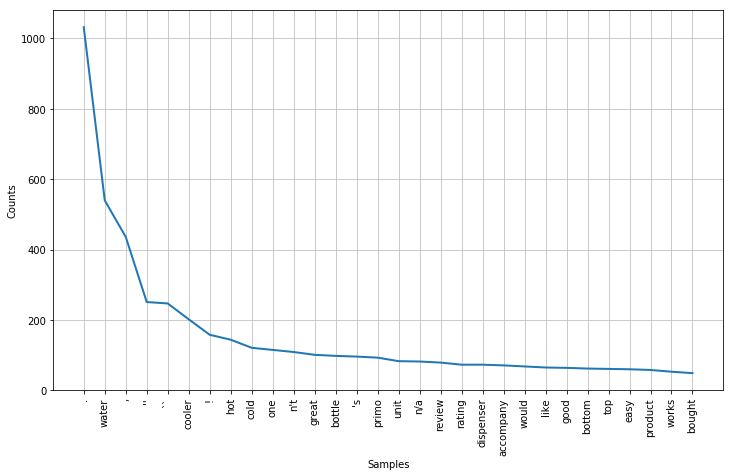

In [18]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Punctuations**

In [0]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]

**Removing Non-Alphabetic Tokens**

In [0]:
filtered_words = [word for word in stripped if word.isalpha()]

**Plotting Filtered Words**

In [0]:
fdist = FreqDist(filtered_words)


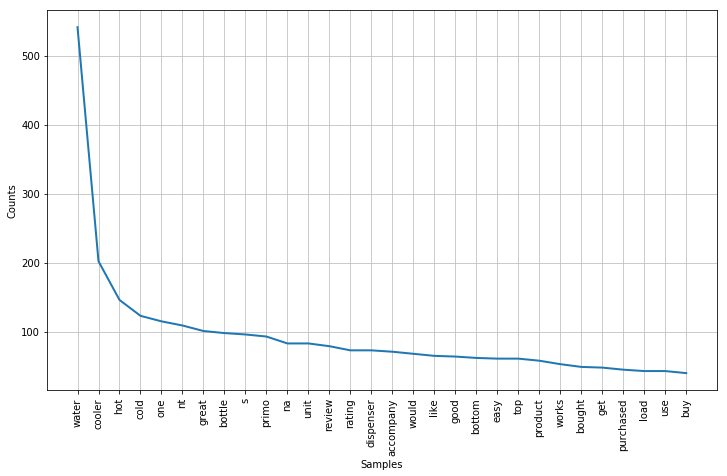

In [22]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Lexicon Normalization, Stemming and Lemmatization**

In [0]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

In [24]:
print("Stemmed Words:",stemmed_words[:100])

Stemmed Words: ['na', 'mine', 'stop', 'dispens', 'water', 'month', 'red', 'light', 'keep', 'flash', 'na', 'review', 'accompani', 'rate', 'broke', 'receipt', 'door', 'hing', 'broken', 'receiv', 'ship', 'damag', 'think', 'prevoiusli', 'return', 'item', 'irrit', 'get', 'new', 'item', 'broken', 'hard', 'get', 'back', 'box', 'return', 'refund', 'plastic', 'hing', 'good', 'idea', 'bottom', 'load', 'water', 'dispens', 'leak', 'like', 'other', 's', 'easi', 'fix', 'buy', 'water', 'gallon', 'glass', 'jug', 'cost', 'read', 'review', 'variou', 'primo', 'water', 'dispens', 'tendenc', 'leak', 'watch', 'mine', 'like', 'hawk', 'water', 'expens', 'let', 'go', 'wast', 'redid', 'kitchen', 'floor', 'lo', 'behold', 'came', 'home', 'week', 'purchas', 'puddl', 'ground', 'front', 'took', 'case', 'apart', 'figur', 'leak', 'come', 'happeningth', 'water', 'get', 'heat', 'round', 'metal', 'cylind', 'cover']


**Trying Lemmatization**

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))

In [27]:
print("Lemmatize Words:",lemma_words[:100])

Lemmatize Words: ['na', 'mine', 'stopped', 'dispensing', 'water', 'month', 'red', 'light', 'keep', 'flashing', 'na', 'review', 'accompany', 'rating', 'broke', 'receipt', 'door', 'hinge', 'broken', 'received', 'shipping', 'damage', 'think', 'prevoiusly', 'returned', 'item', 'irritating', 'get', 'new', 'item', 'broken', 'hard', 'get', 'back', 'box', 'returned', 'refund', 'plastic', 'hinge', 'good', 'idea', 'bottom', 'loading', 'water', 'dispenser', 'leak', 'like', 'others', 's', 'easy', 'fix', 'buy', 'water', 'gallon', 'glass', 'jug', 'cost', 'reading', 'review', 'various', 'primo', 'water', 'dispenser', 'tendency', 'leak', 'watched', 'mine', 'like', 'hawk', 'water', 'expensive', 'let', 'go', 'waste', 'redid', 'kitchen', 'floor', 'lo', 'behold', 'came', 'home', 'week', 'purchasing', 'puddle', 'ground', 'front', 'took', 'casing', 'apart', 'figured', 'leak', 'coming', 'happeningthe', 'water', 'get', 'heated', 'round', 'metal', 'cylinder', 'covered']


**Word Count**

In [28]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 9185


**Word Cloud**

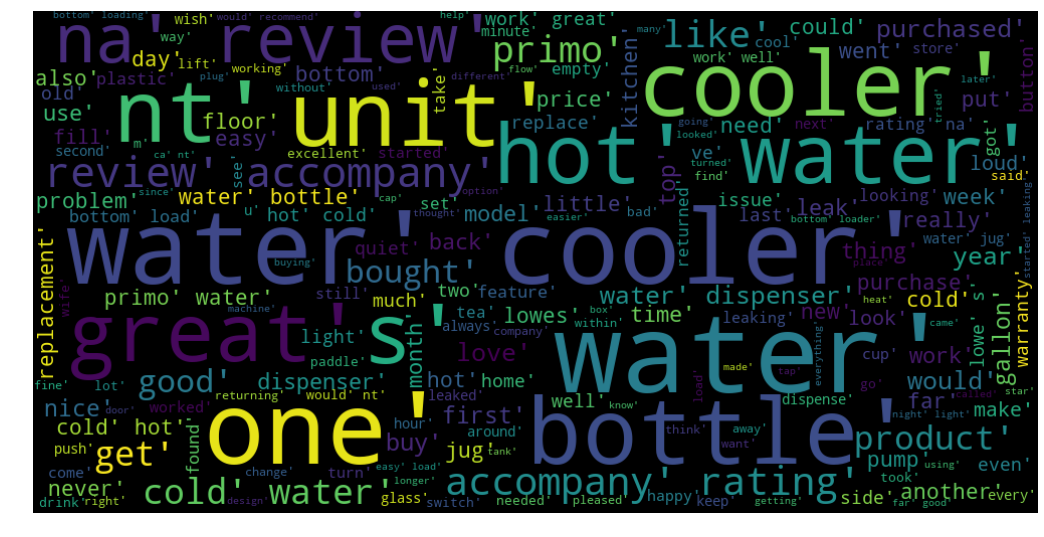

In [29]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Getting only Unique Words**

In [0]:
speech_word_counts = Counter(lemma_words)

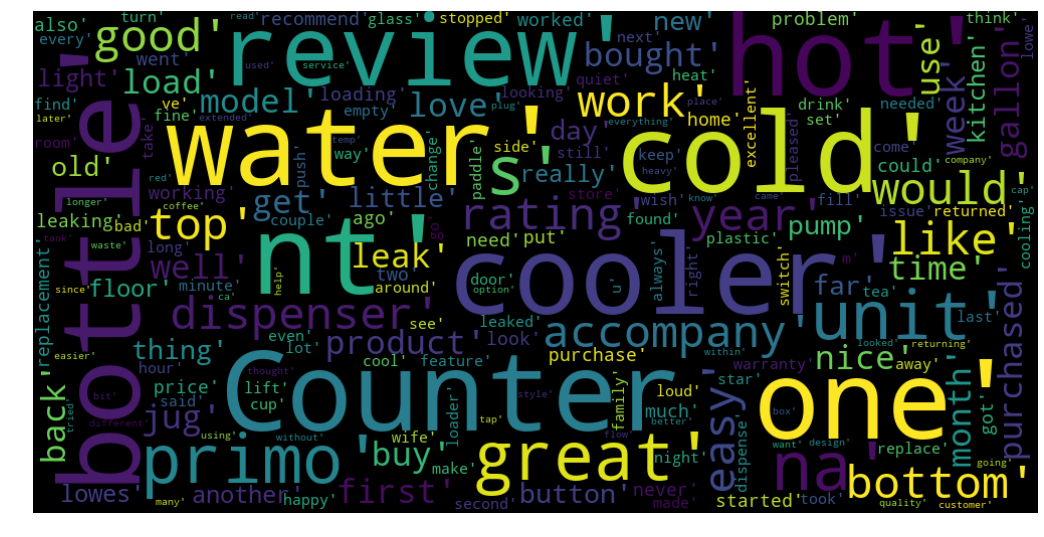

In [31]:
filtered_speech_words = str(speech_word_counts)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Plotting 20 most top words**

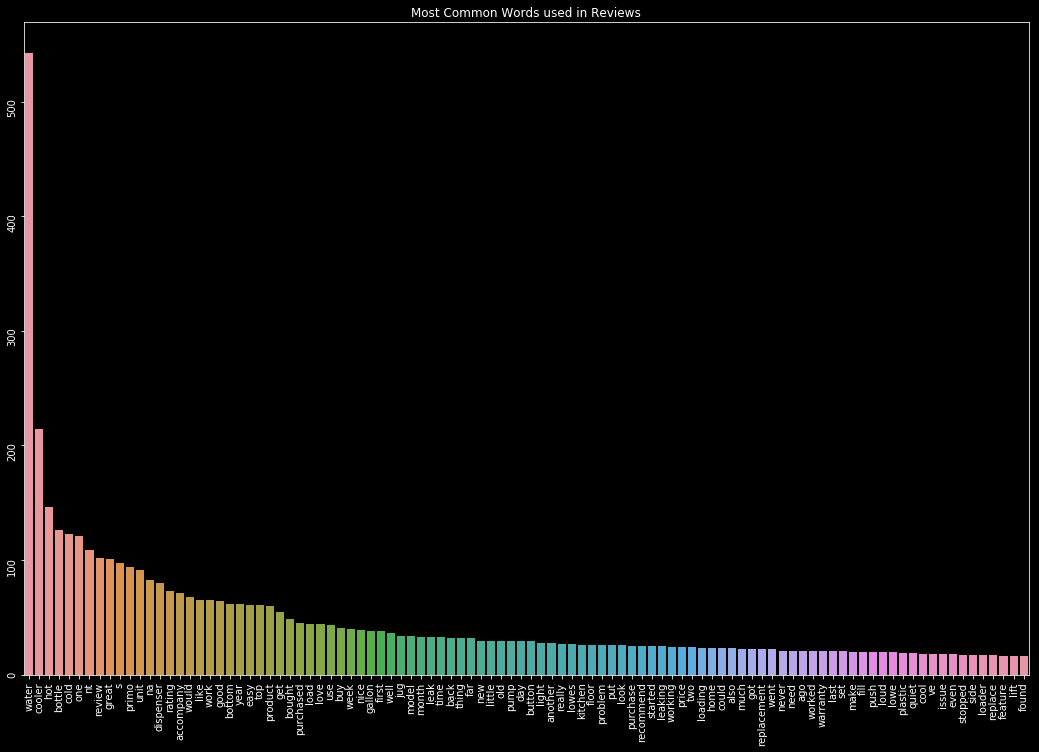

In [32]:
rr_common_words = [word[0] for word in speech_word_counts.most_common(100)]
rr_common_counts = [word[1] for word in speech_word_counts.most_common(100)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=rr_common_words, y=rr_common_counts)
plt.title('Most Common Words used in Reviews')
plt.tick_params(axis ='x', rotation = 90)
plt.tick_params(axis ='y', rotation = 90)
plt.show()

In [0]:
df=pd.DataFrame(speech_word_counts.most_common(100))

In [0]:
df.to_excel('lowes_common_100.xlsx')

**Sentiments Using TextBlob**

In [0]:
speech_text_object = TextBlob(filtered_speech_words)

In [37]:
speech_text_object.sentiment

Sentiment(polarity=0.19580455998131546, subjectivity=0.6577198984765574)

**Plotting words by their sentiments.**

In [0]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

**Plotting Bigrams**

In [0]:
from nltk.util import ngrams

In [39]:
print(text)

 n/a mine stopped dispensing water after 8 months. the red light keeps flashing n/a there is no review to accompany this rating. "broke on receipt" the door hinge was broken when i received it. it was not shipping damage. i think it was a prevoiusly returned item. it was very irritating to get a new item that was broken. it was then hard to get it back in the box. i returned for a refund because the plastic hinge is not a good idea on a bottom loading water dispenser. "leaks like the others - but it's an easy fix." i buy water in 5 gallon glass jugs that costs $4/gal. so, when reading reviews that various primo water dispensers have a tendency to leak, i watched mine like a hawk. the water is too expensive to let it go to waste and i just redid my kitchen floor. lo and behold, i came home about 4 weeks after purchasing it and there was a puddle on the ground in front of it. i took the casing apart and figured out where the leak was coming from - and why it was happening.the water gets 

In [0]:
import itertools

In [0]:
def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

In [0]:
sentences = nltk.sent_tokenize(text)

In [0]:
tokenized = map(nltk.tokenize.word_tokenize, sentences)

In [0]:
bigrams = map(ngrams_wrapper, tokenized)

In [45]:
print(bigrams)

In [0]:
bigram = list(itertools.chain.from_iterable(bigrams))

In [0]:
freq_dist = nltk.FreqDist(bigram)

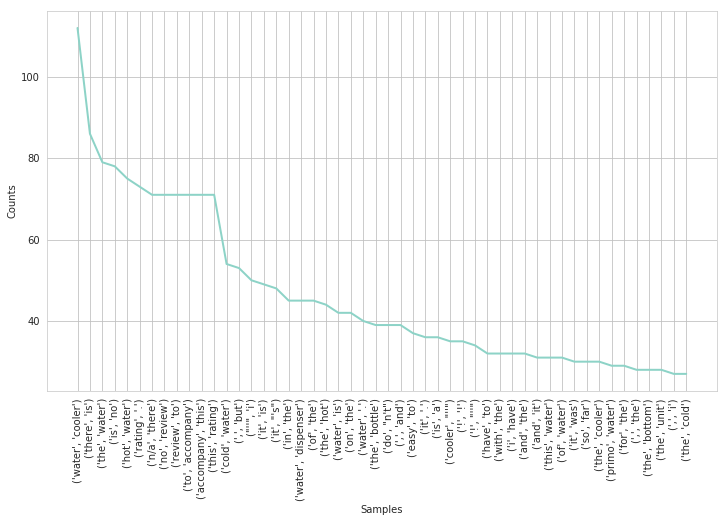

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
freq_dist.plot(50,cumulative=False)
plt.show()

In [0]:
bigrams_7 = map(ngrams_wrapper_2, tokenized)

In [0]:
bigram_7 = list(itertools.chain.from_iterable(bigrams_7))

In [0]:
freq_dist_7 = nltk.FreqDist(bigram_7)

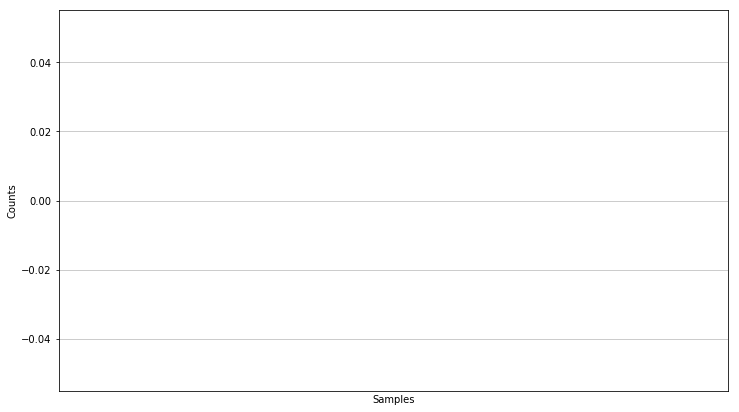

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_7.plot(50,cumulative=False)
plt.show()

In [0]:
prob_dist = nltk.MLEProbDist(freq_dist)

**Bigrams on Lemma Words**

In [0]:
bigrams_2 = map(ngrams_wrapper, lemma_words)

In [0]:
print(lemma_words)

['Everybody', 'come', 'house', 'comment', 'refreshingly', 'cool', 'water', 'cooler', 'Very', 'nice', 'looking', 'Also', 'quiet', 'It', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', 'After', 'checking', 'filling', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'time', 'would', 'We', 'return', 'Since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', 'The', 'unit', 'work', 'well', 'I', 'read', 'hot', 'cold', 'unit', 'leaked', 'want', 'one', 'Hard', 'find', 'type', 'unit', 'Cold', 'It', 'work', 'well', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', 'This', 'easy', 'clean', 'attachment', 'The', 'price', 'however', 'double', 'I', 'paid', 'last', 'one', 'Costco', 'Hard', 'find', 'cold', 'unit', 'I', 'hesitation', 'recommending', 'afford', 'Works', 'Great', 'Works', 'without', 'power', 'Works', 'like', 'charm', 'easy', 'set', 'use', 'took', 'camp', 'work', 'well', 'Great', 'Juice', 'way', 'get', 'w

In [0]:
bigram_2 = list(itertools.chain.from_iterable(bigrams_2))

In [0]:
freq_dist_2 = nltk.FreqDist(bigram_2)

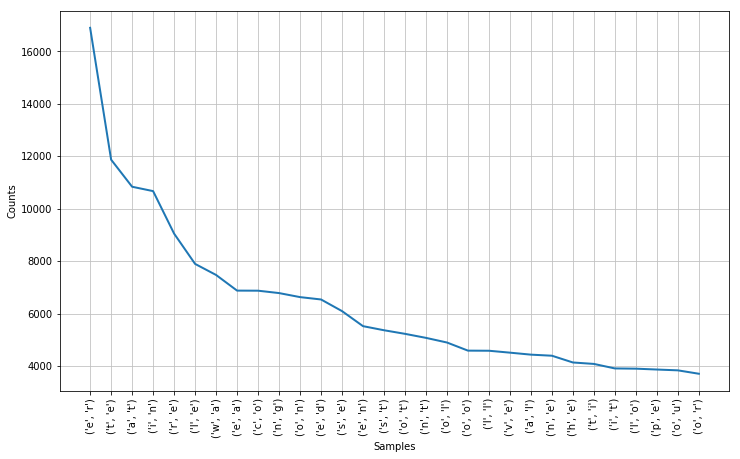

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_2.plot(30,cumulative=False)
plt.show()

**Bigrams on Stemmed words**

In [0]:
def ngrams_wrapper_2(sent):
    return list(nltk.ngrams(sent, 5))

In [0]:
bigrams_3 = map(ngrams_wrapper_2, stemmed_words)

In [0]:
bigram_3 = list(itertools.chain.from_iterable(bigrams_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [0]:
freq_dist_3 = nltk.FreqDist(bigram_3)

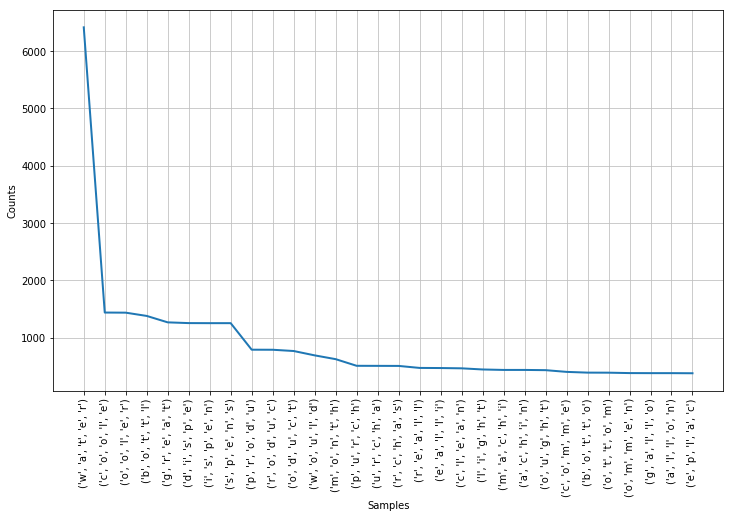

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_3.plot(30,cumulative=False)
plt.show()

In [0]:
https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

**Bigram on Filtered words, removing punctuation**

In [0]:
filtered_words

In [0]:
bigrams_100 = map(ngrams_wrapper, filtered_words)

In [0]:
bigram_100 = list(itertools.chain.from_iterable(bigrams_100))

In [0]:
freq_dist_100 = nltk.FreqDist(bigram_100)

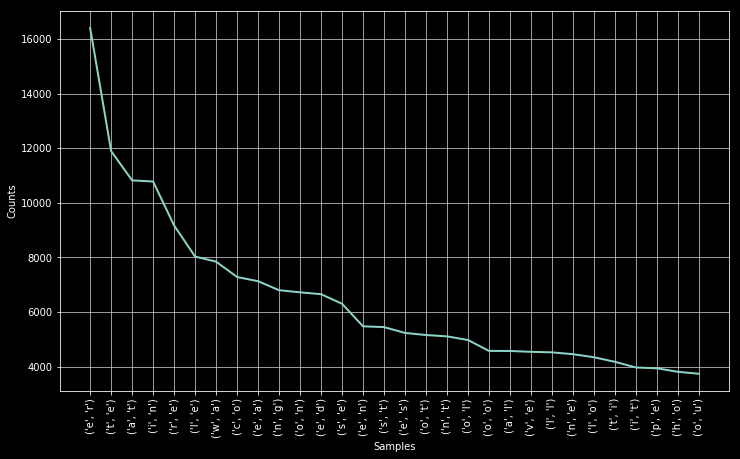

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_100.plot(30,cumulative=False)
plt.show()

**Polarity for each comment**

In [0]:
data5=data1.comb_review

In [0]:
list5=[]
a=""
for w in data5:
  a=str(w).lower()
  list5.append(a)




In [51]:
print(list5[0])

n/a mine stopped dispensing water after 8 months. the red light keeps flashing


In [52]:
len(list5)

322

In [53]:
data1.shape

(322, 33)

In [54]:
senti=[]
for i in list5:
  speech_text_object_2 = TextBlob(str(i))
  senti.append(speech_text_object_2.sentiment.polarity)
print(senti)
  

[0.2, 0.0, -0.26075757575757574, -0.005103174603174604, 0.0, 0.2, 0.15763888888888888, 0.3616666666666667, 0.3, 0.05500000000000001, 0.5171130952380953, 0.5064285714285715, 0.20333333333333337, 0.32916666666666666, -0.175, 0.20555555555555557, 0.041880341880341884, 0.0, 0.3044642857142857, 0.156640625, 0.0, 0.12986111111111112, 0.12068840579710145, 0.25, 0.1787878787878788, 0.2298611111111111, 0.09090909090909093, -0.031944444444444435, 0.5333333333333333, 0.10416666666666667, -0.03333333333333335, 0.0, 0.2593650793650794, 0.11250000000000002, 0.21056547619047622, 0.34374999999999994, 0.20625, -0.15, 0.0, 0.0, 0.0, 0.17142857142857143, 0.09687499999999999, -0.0343181818181818, 0.0, 0.65, 0.0, 0.0, 0.20632716049382718, 0.5111111111111112, 0.14412878787878788, 0.38611111111111107, 0.07827380952380951, 0.26510416666666664, 0.6749999999999999, 0.46481481481481485, 0.0, 0.19100603941513034, 0.0, 0.2568181818181818, 0.20416666666666664, 0.0, -0.5666666666666665, 0.4770833333333333, 0.3166666

In [55]:
len(senti)

322

In [0]:
bond=data1

In [57]:
bond.head(2)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review
0,1,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,Primo,Primo Hot And Cold Water Dispenser,1000690816,NaN,188.99,2019-02-11 12:30:59,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,NaN,02/01/2019,NaN,NaN,2,2,1,5,NaN,Mine stopped dispensing water after 8 months. ...,NaN,NaN,NaN,NaN,1,1,n/a Mine stopped dispensing water after 8 mont...
1,2,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,Primo,Primo Hot And Cold Water Dispenser,1000690812,NaN,174.00,2019-02-11 12:31:15,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,NaN,12/29/2018,NaN,NaN,0,0,4,5,NaN,There is no review to accompany this rating.,NaN,NaN,NaN,NaN,1,1,n/a There is no review to accompany this rating.


In [0]:
bond["Polarity"]=senti

In [59]:
bond.tail(2)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review,Polarity
320,8,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-White-Top-Loadi...,Primo,Primo White Top-Loading Cold and Hot Water Coo...,50154270,NaN,99.0,2019-02-11 12:35:42,https://www.lowes.com/pd/Primo-White-Top-Loadi...,"""Great Alternative to Buying Bottled Water eve...",12/23/2017,NaN,NaN,3,3,5,5,NaN,We bought this water cooler back in 2012. It h...,NaN,NaN,NaN,NaN,67,67,"""Great Alternative to Buying Bottled Water eve...",0.273125
321,8,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-White-Top-Loadi...,Primo,Primo White Top-Loading Cold and Hot Water Coo...,50154270,NaN,99.0,2019-02-11 12:35:42,https://www.lowes.com/pd/Primo-White-Top-Loadi...,NaN,12/28/2018,NaN,NaN,0,0,5,5,NaN,There is no review to accompany this rating.,NaN,NaN,NaN,NaN,67,67,n/a There is no review to accompany this rating.,0.000000


In [0]:
bond.to_excel('varad_1.xlsx')

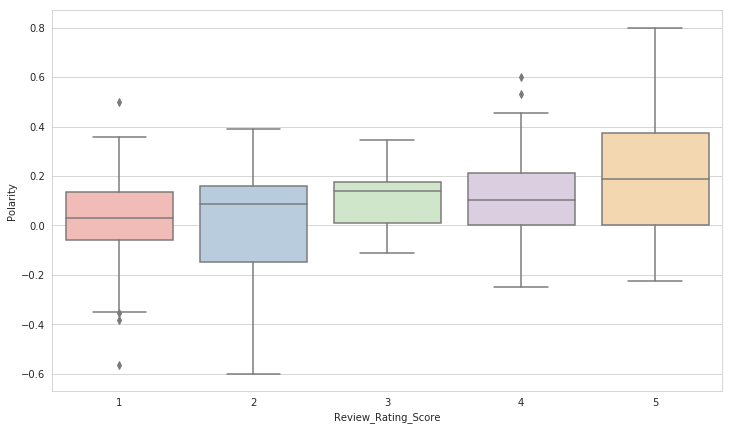

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Polarity',data=bond,palette='Pastel1',color='white')

In [0]:
bond.shape

(4157, 33)

In [61]:
sub=[]
for i in list5:
  speech_text_object_3 = TextBlob(str(i))
  sub.append(speech_text_object_3.sentiment.subjectivity)
print(sub)
  

[0.35, 0.0, 0.48517316017316015, 0.407031746031746, 0.0, 0.4772727272727273, 0.5625, 0.77, 0.7972222222222222, 0.475, 0.6845238095238095, 0.6828571428571429, 0.31, 0.6979166666666667, 0.65, 0.5222222222222223, 0.3709401709401709, 0.0, 0.7607142857142857, 0.6125, 1.0, 0.3819444444444444, 0.577536231884058, 0.5, 0.8181818181818182, 0.6277777777777778, 0.478030303030303, 0.7000000000000002, 0.6333333333333334, 0.49583333333333335, 0.5333333333333333, 0.0, 0.5823809523809523, 0.6888888888888889, 0.9333333333333333, 0.6875, 0.3375000000000001, 0.35, 0.0, 0.0, 0.0, 0.45714285714285713, 0.88125, 0.509090909090909, 0.55, 0.675, 0.0, 0.0, 0.43487654320987656, 0.6777777777777779, 0.4068181818181818, 0.612962962962963, 0.6333333333333334, 0.7000000000000001, 0.75, 0.6296296296296298, 0.0, 0.7196386946386946, 0.0, 0.505597643097643, 0.48819444444444443, 0.0, 0.8888888888888888, 0.8583333333333333, 0.6583333333333333, 0.7000000000000001, 0.8166666666666667, 0.27666666666666667, 0.6692307692307692, 

In [0]:
bond["Subjectivity"]=sub

In [63]:
bond.head(5)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review,Polarity,Subjectivity
0,1,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,Primo,Primo Hot And Cold Water Dispenser,1000690816,NaN,188.99,2019-02-11 12:30:59,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,NaN,02/01/2019,NaN,NaN,2,2,1,5,NaN,Mine stopped dispensing water after 8 months. ...,NaN,NaN,NaN,NaN,1,1,n/a Mine stopped dispensing water after 8 mont...,0.200000,0.350000
1,2,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,Primo,Primo Hot And Cold Water Dispenser,1000690812,NaN,174.00,2019-02-11 12:31:15,https://www.lowes.com/pd/Primo-Hot-And-Cold-Wa...,NaN,12/29/2018,NaN,NaN,0,0,4,5,NaN,There is no review to accompany this rating.,NaN,NaN,NaN,NaN,1,1,n/a There is no review to accompany this rating.,0.000000,0.000000
2,3,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,Primo,Primo Black/SS Bottom-Loading Cold and Hot Wat...,50154268,NaN,199.00,2019-02-11 12:27:44,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,"""Broke on receipt""",01/03/2015,NaN,NaN,10,20,1,5,NaN,The door hinge was broken when i received it. ...,NaN,NaN,NaN,NaN,121,121,"""Broke on receipt"" The door hinge was broken w...",-0.260758,0.485173
3,3,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,Primo,Primo Black/SS Bottom-Loading Cold and Hot Wat...,50154268,NaN,199.00,2019-02-11 12:31:15,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,"""LEAKS LIKE THE OTHERS - but it's an easy fix.""",01/03/2015,NaN,NaN,176,202,3,5,NaN,I buy water in 5 gallon glass jugs that costs ...,NaN,NaN,NaN,NaN,121,121,"""LEAKS LIKE THE OTHERS - but it's an easy fix....",-0.005103,0.407032
4,3,Appliances#||#Water Coolers,Lowes,Appliances,Water Coolers,NaN,NaN,NaN,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,Primo,Primo Black/SS Bottom-Loading Cold and Hot Wat...,50154268,NaN,199.00,2019-02-11 12:23:17,https://www.lowes.com/pd/Primo-Black-SS-Bottom...,NaN,01/04/2019,NaN,NaN,0,0,5,5,NaN,There is no review to accompany this rating.,NaN,NaN,NaN,NaN,121,121,n/a There is no review to accompany this rating.,0.000000,0.000000


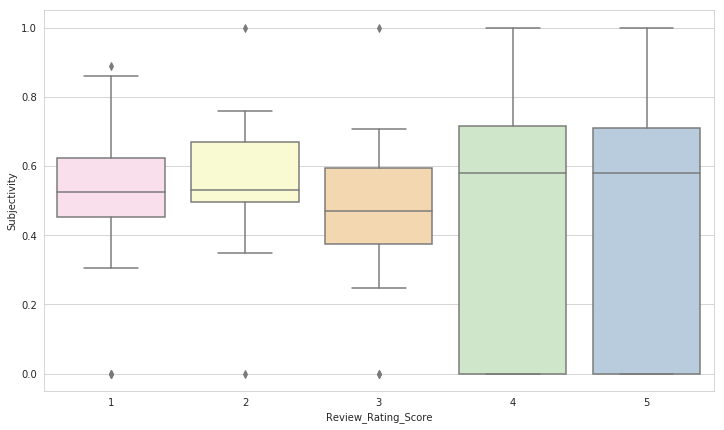

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Subjectivity',data=bond,palette='Pastel1_r',color='white')

**Polarity of Unique Words, use this**

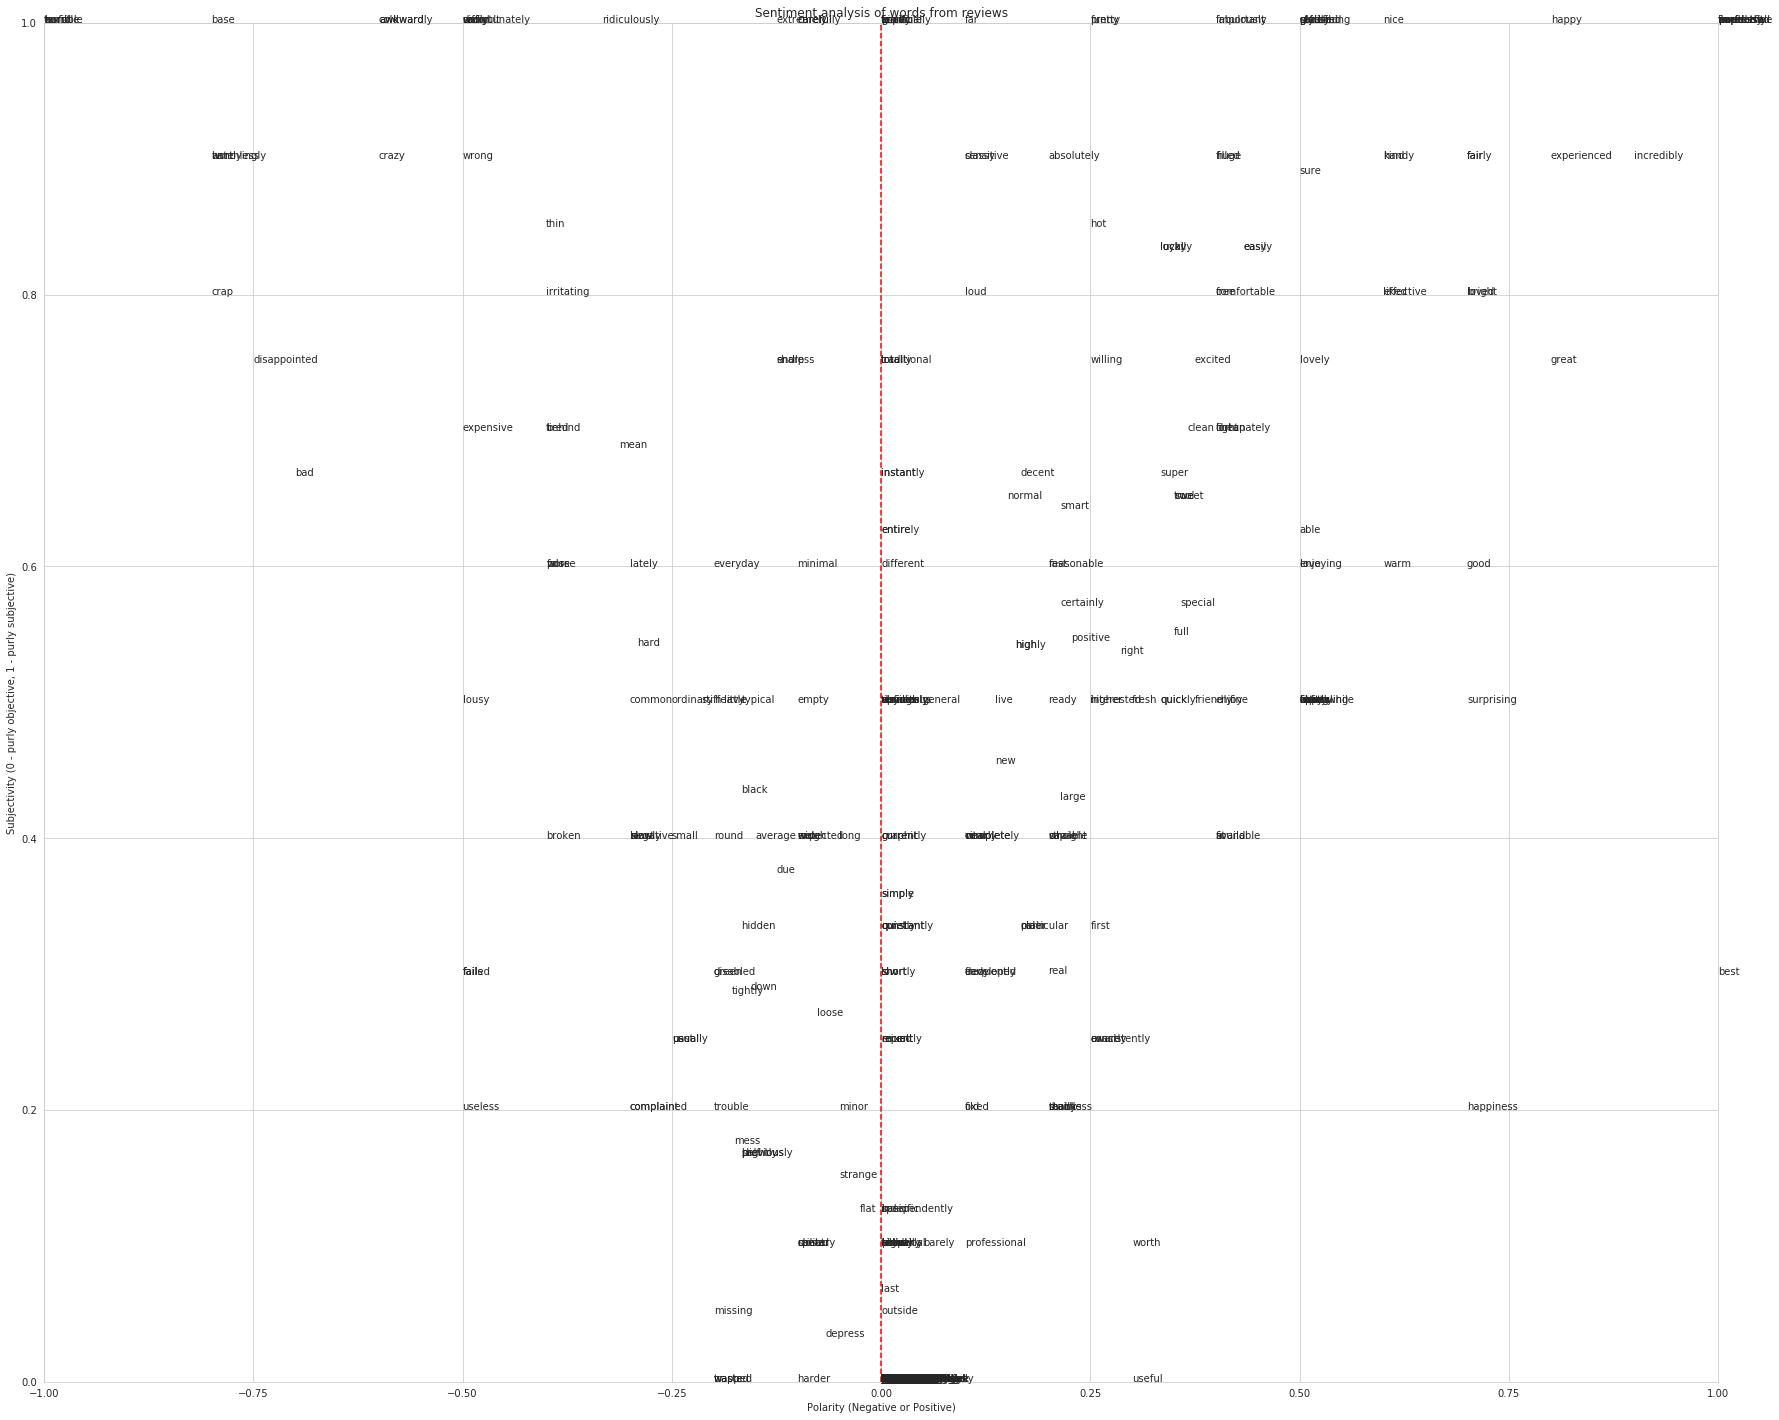

In [65]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in speech_word_counts:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

In [0]:
bond.to_excel('combined_pol_sub.xlsx')

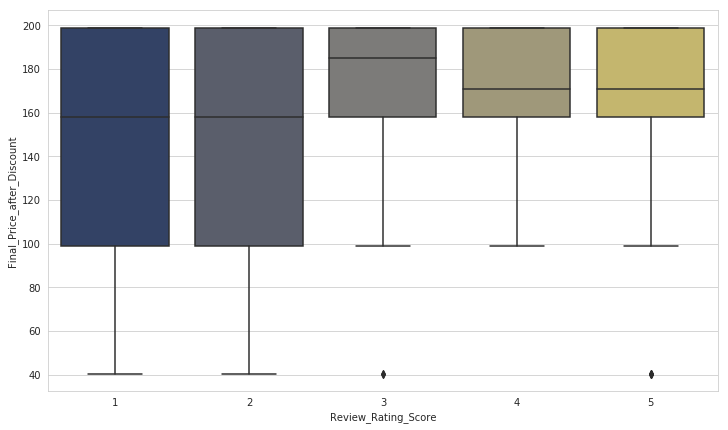

In [66]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Final_Price_after_Discount',data=bond,palette='cividis',color='white')

**Trying NER, not possible due to large number of Characters**

In [0]:
import spacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
doc = nlp(text)

In [0]:
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

Text(0.5, 1.0, 'Ratings on Lowes')

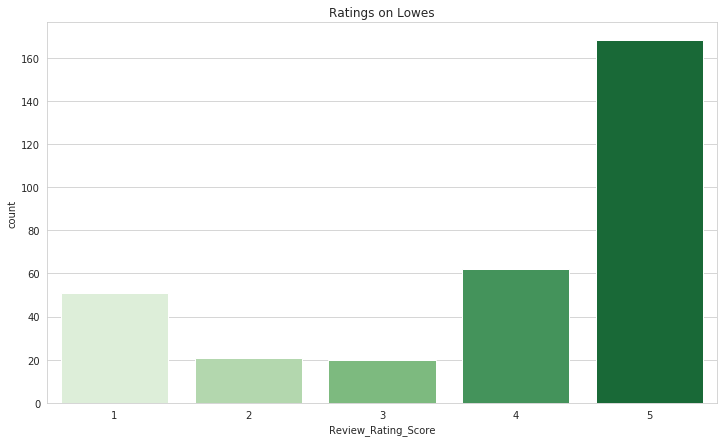

In [69]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Review_Rating_Score',data=bond, palette='Greens')
plt.title('Ratings on Lowes')

In [0]:
bond.to_excel('amazon_pol_sub.xlsx')